# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [ ]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename, header=0)

df.head()
# df.head(25)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>

1. I chose the census data set.
2. I am predicting whether a person's income is greater than 50k or not, so the label is 'income_binary' and will contain True or False.  
3. This is a supervised learning problem with binary classification as there are only two options.
4. Features for now are all other columns that are not the label.
5. This is an important problem because it is important that employees of a company are being paid sufficient amounts of money for their labor.  A company, if they cared, would care about the welfare of their employees and want to make sure they pay their workers enough so that they do not fall below the poverty line.  

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [ ]:
# preparing label
df.dropna(axis=0, inplace=True)
df.drop(columns=['fnlwgt'], inplace=True)

df_income_bin = pd.get_dummies(df['income_binary'], prefix='income_binary_')
# df_income_bin.drop(columns = df_income_bin['income_binary_<=50k'], inplace=True)
df_income_bin.columns

Index(['income_binary__<=50K', 'income_binary__>50K'], dtype='object')

In [ ]:
# Concatenate DataFrame df with the one-hot encoded DataFrame df_Married
df = df.join(df_income_bin['income_binary__>50K'])

# Remove the original 'Married' column from DataFrame df
df.drop(columns = ['income_binary'], inplace=True)
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex_selfID', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country',
       'income_binary__>50K'],
      dtype='object')

In [ ]:
# One hot encoding - object dtypes
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'native-country']

In [ ]:
df[to_encode].nunique()

workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex_selfID         2
native-country    41
dtype: int64

In [ ]:
# Checking each object type column to one hot encode with pandas
# inspect
df['workclass'].unique()

# tHERE ARE 7

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [ ]:
# dropping  missing values
df.dropna(axis=0, inplace=True)
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [ ]:
# Use pd.get_dummies() to create a new DataFrame with the one-hot encoded values.
df_workclass = pd.get_dummies(df['workclass'], prefix='workclass_')
df_workclass

,workclass__Federal-gov,workclass__Local-gov,workclass__Private,workclass__Self-emp-inc,workclass__Self-emp-not-inc,workclass__State-gov,workclass__Without-pay
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0
32557,0,0,1,0,0,0,0
32558,0,0,1,0,0,0,0
32559,0,0,1,0,0,0,0


In [ ]:
# Concatenate DataFrame df with the one-hot encoded DataFrame df_workclass
df = df.join(df_workclass)

# Remove the original 'workclass' column from DataFrame df
df.drop(columns = 'workclass', inplace=True)
# df.head()

In [ ]:
top_10_edu = list(df['education'].value_counts().head(10).index)

top_10_edu

['HS-grad',
 'Some-college',
 'Bachelors',
 'Masters',
 'Assoc-voc',
 '11th',
 'Assoc-acdm',
 '10th',
 '7th-8th',
 'Prof-school']

In [ ]:
for value in top_10_edu:
    
    ## Create columns and their values
    df['edu_'+ value] = np.where(df['education']==value,1,0)
    
    
# Remove the original column from your DataFrame df
df.drop(columns = 'education', inplace=True)

In [ ]:
# Use pd.get_dummies() to create a new DataFrame with the one-hot encoded values.
df_marital = pd.get_dummies(df['marital-status'], prefix='marital-status_')
df_marital

,marital-status__Divorced,marital-status__Married-AF-spouse,marital-status__Married-civ-spouse,marital-status__Married-spouse-absent,marital-status__Never-married,marital-status__Separated,marital-status__Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0
32557,0,0,1,0,0,0,0
32558,0,0,0,0,0,0,1
32559,0,0,0,0,1,0,0


In [ ]:
# Concatenate DataFrame df with the one-hot encoded DataFrame df_workclass
df = df.join(df_marital)

# Remove the original 'workclass' column from DataFrame df
df.drop(columns = 'marital-status', inplace=True)
# df.head()

In [ ]:
top_10_occup = list(df['occupation'].value_counts().head(10).index)

top_10_occup

['Prof-specialty',
 'Craft-repair',
 'Exec-managerial',
 'Adm-clerical',
 'Sales',
 'Other-service',
 'Machine-op-inspct',
 'Transport-moving',
 'Handlers-cleaners',
 'Farming-fishing']

In [ ]:
for value in top_10_occup:
    
    ## Create columns and their values
    df['occup_'+ value] = np.where(df['occupation']==value,1,0)
    
    
# Remove the original column from your DataFrame df
df.drop(columns = 'occupation', inplace=True)

In [ ]:
df_relationship = pd.get_dummies(df['relationship'], prefix= 'relationship_')
df_relationship

,relationship__Husband,relationship__Not-in-family,relationship__Other-relative,relationship__Own-child,relationship__Unmarried,relationship__Wife
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
32556,0,0,0,0,0,1
32557,1,0,0,0,0,0
32558,0,0,0,0,1,0
32559,0,0,0,1,0,0


In [ ]:
# Concatenate DataFrame df with the one-hot encoded DataFrame df_workclass
df = df.join(df_relationship)

# Remove the original 'workclass' column from DataFrame df
df.drop(columns = 'relationship', inplace=True)
# df.head()

In [ ]:
df_race = pd.get_dummies(df['race'], prefix= 'race_')
df_race

,race__Amer-Indian-Inuit,race__Asian-Pac-Islander,race__Black,race__Other,race__White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
32556,0,0,0,0,1
32557,0,0,0,0,1
32558,0,0,0,0,1
32559,0,0,0,0,1


In [ ]:
# Concatenate DataFrame df with the one-hot encoded DataFrame df_workclass
df = df.join(df_race)

# Remove the original 'workclass' column from DataFrame df
df.drop(columns = 'race', inplace=True)
# df.head()

In [ ]:
df_sex = pd.get_dummies(df['sex_selfID'], prefix= 'sex_selfID_')
df_sex

,sex_selfID__Female,sex_selfID__Non-Female
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
32556,1,0
32557,0,1
32558,1,0
32559,0,1


In [ ]:
# Concatenate DataFrame df with the one-hot encoded DataFrame df_workclass
df = df.join(df_sex)

# Remove the original 'workclass' column from DataFrame df
df.drop(columns = 'sex_selfID', inplace=True)
# df.head()

In [ ]:
top_10_native = list(df['native-country'].value_counts().head(10).index)

top_10_native

['United-States',
 'Mexico',
 'Philippines',
 'Germany',
 'Puerto-Rico',
 'Canada',
 'El-Salvador',
 'India',
 'Cuba',
 'England']

In [ ]:
for value in top_10_native:
    
    ## Create columns and their values
    df['native-country_'+ value] = np.where(df['native-country']==value,1,0)
    
    
# Remove the original column from your DataFrame df
df.drop(columns = 'native-country', inplace=True)

In [ ]:
df.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_binary__>50K', 'workclass__Federal-gov',
       'workclass__Local-gov', 'workclass__Private', 'workclass__Self-emp-inc',
       'workclass__Self-emp-not-inc', 'workclass__State-gov',
       'workclass__Without-pay', 'edu_HS-grad', 'edu_Some-college',
       'edu_Bachelors', 'edu_Masters', 'edu_Assoc-voc', 'edu_11th',
       'edu_Assoc-acdm', 'edu_10th', 'edu_7th-8th', 'edu_Prof-school',
       'marital-status__Divorced', 'marital-status__Married-AF-spouse',
       'marital-status__Married-civ-spouse',
       'marital-status__Married-spouse-absent',
       'marital-status__Never-married', 'marital-status__Separated',
       'marital-status__Widowed', 'occup_Prof-specialty', 'occup_Craft-repair',
       'occup_Exec-managerial', 'occup_Adm-clerical', 'occup_Sales',
       'occup_Other-service', 'occup_Machine-op-inspct',
       'occup_Transport-moving', 'occup_Handlers-cleaners',
       'occup_

In [ ]:
import scipy.stats as stats

In [ ]:
# winsorizing - outliers section 
df['education_years'] = stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])

In [ ]:
# Check that the values of education-num and education_years are not identical.
column_ranges = np.subtract(df['education-num'], df['education_years'])
column_ranges.unique()
# truth = df['education-num'] == df['education_years']
# truth

array([ 0, -2, -1])

In [ ]:
# section - Finding and Replacing Missing Data
nan_count = np.sum(df.isnull(), axis = 0)

nan_count

age                           0
education-num                 0
capital-gain                  0
capital-loss                  0
hours-per-week                0
                             ..
native-country_El-Salvador    0
native-country_India          0
native-country_Cuba           0
native-country_England        0
education_years               0
Length: 64, dtype: int64

In [ ]:
df.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,income_binary__>50K,workclass__Federal-gov,workclass__Local-gov,workclass__Private,workclass__Self-emp-inc,...,native-country_Mexico,native-country_Philippines,native-country_Germany,native-country_Puerto-Rico,native-country_Canada,native-country_El-Salvador,native-country_India,native-country_Cuba,native-country_England,education_years
age,1.000000,0.044791,0.127287,0.061304,0.100036,0.242038,0.057490,0.068756,-0.212122,0.111927,...,-0.057171,0.008179,0.006508,0.008365,0.015346,-0.017085,-0.001314,0.030073,0.012729,0.046422
education-num,0.044791,1.000000,0.167011,0.079042,0.151987,0.335094,0.058894,0.096592,-0.164627,0.077987,...,-0.224556,0.026784,0.024936,-0.042343,0.013122,-0.071137,0.051291,-0.009352,0.021846,0.999193
capital-gain,0.127287,0.167011,1.000000,-0.056215,0.102879,0.344562,0.007750,-0.002670,-0.055965,0.098832,...,-0.026929,-0.002561,0.004761,-0.007406,0.004177,-0.001828,0.009643,-0.005676,0.005011,0.168127
capital-loss,0.061304,0.079042,-0.056215,1.000000,0.052593,0.150386,0.011293,0.015431,-0.037134,0.030782,...,-0.023359,0.003464,-0.000742,-0.004431,0.008969,-0.010306,0.006401,-0.002253,0.000276,0.079609
hours-per-week,0.100036,0.151987,0.102879,0.052593,1.000000,0.229702,0.005590,0.001579,-0.095170,0.125968,...,-0.003181,-0.009954,0.004101,-0.011934,0.004448,-0.018463,0.003459,-0.005639,0.007795,0.152658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_El-Salvador,-0.017085,-0.071137,-0.001828,-0.010306,-0.018463,-0.020912,-0.003523,-0.004017,0.018188,-0.007905,...,-0.008285,-0.004540,-0.003769,-0.003458,-0.003425,1.000000,-0.003309,-0.003206,-0.003026,-0.068532
native-country_India,-0.001314,0.051291,0.009643,0.006401,0.003459,0.019805,-0.003523,-0.010980,-0.003186,0.011075,...,-0.008285,-0.004540,-0.003769,-0.003458,-0.003425,-0.003309,1.000000,-0.003206,-0.003026,0.052076
native-country_Cuba,0.030073,-0.009352,-0.005676,-0.002253,-0.005639,0.002923,-0.002985,-0.005554,0.001443,0.018657,...,-0.008027,-0.004399,-0.003651,-0.003350,-0.003318,-0.003206,-0.003206,1.000000,-0.002931,-0.008901
native-country_England,0.012729,0.021846,0.005011,0.000276,0.007795,0.012723,-0.002013,-0.001603,0.000632,-0.003208,...,-0.007577,-0.004152,-0.003446,-0.003162,-0.003132,-0.003026,-0.003026,-0.002931,1.000000,0.022147


In [ ]:
df.corr()['income_binary__>50K']

age                           0.242038
education-num                 0.335094
capital-gain                  0.344562
capital-loss                  0.150386
hours-per-week                0.229702
                                ...   
native-country_El-Salvador   -0.020912
native-country_India          0.019805
native-country_Cuba           0.002923
native-country_England        0.012723
education_years               0.336730
Name: income_binary__>50K, Length: 64, dtype: float64

In [ ]:
# Do not remove or edit the line below:
corrs = df.corr()['income_binary__>50K'].drop(['income_binary__>50K', 'education-num'], axis = 0)

corrs_sorted = corrs.sort_values(ascending=False) 
corrs_sorted

marital-status__Married-civ-spouse    0.445283
relationship__Husband                 0.400821
capital-gain                          0.344562
education_years                       0.336730
age                                   0.242038
                                        ...   
occup_Other-service                  -0.165513
relationship__Not-in-family          -0.193098
sex_selfID__Female                   -0.216267
relationship__Own-child              -0.226255
marital-status__Never-married        -0.320415
Name: income_binary__>50K, Length: 62, dtype: float64

In [ ]:
# drop uncorrelated
list = corrs.sort_values(ascending=True) > 0
newlist = ['relationship__Husband',
       'marital-status__Married-civ-spouse', 'income_binary__>50K']
# dropthis = df.columns != newlist
# dropthis
df_linear = df[newlist]
# df.drop(['marital-status__Never-married', 'relationship__Own-child', 'sex_selfID__Female', 'relationship__Not-in-family'])

In [ ]:
X = df_linear.drop(columns = 'income_binary__>50K', axis=1)
y = df_linear['income_binary__>50K'] # label

In [ ]:
corrs = df_linear.corr()['income_binary__>50K'].drop(['income_binary__>50K'], axis = 0)

corrs_sorted = corrs.sort_values(ascending=False) 
corrs_sorted

marital-status__Married-civ-spouse    0.445283
relationship__Husband                 0.400821
Name: income_binary__>50K, dtype: float64

In [ ]:
df_linear.shape

(29716, 3)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>

- **I do have a new feature list.  After inspecting the data, there were some null categories and values within the feature columns.  I removed those and removed unnecessary columns like 'fnlwgt' which has meaning to predicting the label.**

- **Different data preparation techniques I used:**
    - one hot encoding to transform categorical data into numbers so that the computer can understand and try to predict the label better.
    - transformed data of 'income_binary' to properly represent the label, is the person's income greater than 50k or not.  I had to remove 'income_binary' and replace it with 'income_binary_>50k' with values ```0``` for FALSE and ```1``` for TRUE.
    
    - After experimenting and trying to train a Logisitic Regression model:
        - will deal with outliers found in education, age, and hours-per-week.   <!-- -unit 2  -->
        - find which features are most corrolated with the label

- **I am planning to have 4 models:**
- I did not end up using a Logistic Regression model because I kept getting warnings of non-covergance
    - First model is simple: one hot encode and use Linear Regression
    - Next model(s) will involved Stacking, Decision Trees, and Random Forests

- **Plan for training, analysis, and improvement:**
  - Start simple and slowly get more complex (Agile technique)   <!-- -unit 9  -->
  - More complex means getting rid of irrelevant features with feature-to-label correlation methods and handling outliers  <!-- -unit 9  -->
  - Include Hyperparameter testing
  - Adjust percentage of test size
  - Using bar graph to compare 4 models


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [ ]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression # could not get convergance
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [ ]:
X_ltrain, X_ltest, y_ltrain, y_ltest = train_test_split(X, y, test_size=0.10,random_state=1234)

In [ ]:
# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_ltrain, y_ltrain)

#  Make predictions on the test data 
prediction = model.predict(X_ltest)

In [ ]:
# Weight_1 (weight of feature LogGDP)
print('Model Summary\n\nWeight_1 =  ', model.coef_[0], '[ weight of feature husband and marriage ]')
# alpha
print('Alpha = ', model.intercept_, '[ intercept ]')

Model Summary

Weight_1 =   0.001821142564439252 [ weight of feature husband and marriage ]
Alpha =  0.06931356280207276 [ intercept ]


In [ ]:
# Evaluate
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_ltest, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_ltest, prediction))
# example:
# Examining the evaluation metrics, we have an RMSE of 0.71. This means that, on average, our predictions are off by 0.71 units. Since the Happiness feature in our data set ranges between about 2.5 and 8, this result is not bad! To truly evaluate this we would want to compare this result to the RMSE when using another simpler model, such as using the mean value of the Happiness feature as our prediction for every value of LogGDP.

# The 𝑅2
# value of 0.62 implies that 62% of the variation in the Happiness feature was explained with the model by variation in LogGDP. There is some subjectivity to interpreting what value is sufficient to justify the use of the model here, but let's just say that in the social sciences, it could also be a lot worse than 56%!

# so this is not a good model to use since 
# RMSE =   0.38
#  R^2 =   0.20
# try separating marriage and husband...but ultimately they seem the same when corrolated with label 


Model Performance

RMSE =   0.38
 R^2 =   0.20


In [ ]:
# separate marriage
X = df_linear.drop(columns = ['income_binary__>50K', 'marital-status__Married-civ-spouse'], axis=1)
y = df_linear['income_binary__>50K'] # label

In [ ]:
X_train_marstatus, X_test_marstatus, y_train_marstatus, y_test_marstatus = train_test_split(X, y, test_size=0.40,random_state=1234)

In [ ]:
# Create the  LinearRegression model object 
model_marstatus = LinearRegression()

# Fit the model to the training data 
model_marstatus.fit(X_train_marstatus, y_train_marstatus)

#  Make predictions on the test data 
prediction = model_marstatus.predict(X_test_marstatus)

print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test_marstatus, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test_marstatus, prediction))

# basically no difference


Model Performance

RMSE =   0.39
 R^2 =   0.16


In [ ]:
X_hub = df_linear.drop(columns = ['income_binary__>50K', 'relationship__Husband'], axis=1)
y_hub = df_linear['income_binary__>50K'] # label

In [ ]:
# try more data columns
newlist = ['relationship__Husband',
       'marital-status__Married-civ-spouse', 'income_binary__>50K', 'education_years', 'age', 'hours-per-week']

lst = ['relationship__Husband',
       'marital-status__Married-civ-spouse', 'income_binary__>50K', 'education_years', 'age', 'hours-per-week', 'capital-gain']

DTdf = df[newlist]
best_dt = df[lst]

X_dt = DTdf.drop(columns = ['income_binary__>50K'], axis=1)
y_dt = DTdf['income_binary__>50K'] # label

X_dt_best = best_dt.drop(columns=['income_binary__>50K'], axis=1)
y_dt_best = df['income_binary__>50K'] # label

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.10,random_state=1234)
X_dt

X_train_dt_best, X_test_dt_best, y_train_dt_best, y_test_dt_best = train_test_split(X_dt_best, y_dt_best, test_size=0.60,random_state=1234)

In [ ]:
X_train_hub, X_test_hub, y_train_hub, y_test_hub = train_test_split(X_hub, y_hub, test_size=0.10,random_state=1234)

# Create the  LinearRegression model object 
model_hub = LinearRegression()

# Fit the model to the training data 
model_hub.fit(X_train_dt_best, y_train_dt_best)

#  Make predictions on the test data 
y_lr_pred = model_hub.predict(X_test_dt_best)

print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test_dt_best, y_lr_pred)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test_dt_best, y_lr_pred))

# basically no difference as well, conclude that there is no linear pattern ... need different model

# dt best data:
# Model Performance
# RMSE =   0.35
#  R^2 =   0.34

# dt best data with test_size0.3, 0.5


Model Performance

RMSE =   0.34
 R^2 =   0.36


In [ ]:
# 1. Compute the RMSE using mean_squared_error()
lr_rmse = mean_squared_error(y_test_dt_best, y_lr_pred, squared=False)


# 2. Compute the R2 score using r2_score()
lr_r2 = r2_score(y_test_dt_best, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.34424574741522246
[LR] R2: 0.3584165550341958


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
cs=[i for i in range(4,9)]
lf=[i for i in range(25,51)]
param_grid = dict(max_depth = cs, min_samples_leaf=lf)
param_grid

{'max_depth': [4, 5, 6, 7, 8],
 'min_samples_leaf': [25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50]}

In [ ]:
print('Running Grid Search...')

# 1. Create a DecisionTreeRegressor model object without supplying arguments. 
#    Save the model object to the variable 'dt_regressor'

dt_regressor = DecisionTreeRegressor()


# 2. Run a Grid Search with 3-fold cross-validation and assign the output to the object 'dt_grid'.
#    * Pass the model and the parameter grid to GridSearchCV()
#    * Set the number of folds to 3
#    * Specify the scoring method

dt_grid = GridSearchCV(dt_regressor, param_grid, cv=5)


# 3. Fit the model (use the 'grid' variable) on the training data and assign the fitted model to the 
#    variable 'dt_grid_search'

dt_grid_search = dt_grid.fit(X_train_dt_best, y_train_dt_best)

print('Done')

Running Grid Search...
Done


In [ ]:
rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

[DT] RMSE for the best model is : -0.43


In [ ]:
dt_best_params = dt_grid_search.best_params_    

dt_best_params

{'max_depth': 7, 'min_samples_leaf': 26}

In [ ]:
dt_model = DecisionTreeRegressor(max_depth=dt_grid_search.best_params_['max_depth'], min_samples_leaf=dt_grid_search.best_params_['min_samples_leaf'])
dt_model.fit(X_train_dt_best, y_train_dt_best) 

DecisionTreeRegressor(max_depth=7, min_samples_leaf=26)

In [ ]:
# 1. Use the fitted model to make predictions on the test data
y_dt_pred = dt_model.predict(X_test_dt_best)


# 2. Compute the RMSE using mean_squared_error()
dt_rmse = mean_squared_error(y_test_dt_best, y_dt_pred, squared=False)


# 3. Compute the R2 score using r2_score()
dt_r2 = r2_score(y_test_dt_best, y_dt_pred)


print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))
# not much better than linear LMAO - with same dataset from linear
# no difference when changed to hub subset

# subset with more data, without rid of outliers in capital-gain (dt_best) 
# -  Root Mean Squared Error: 0.33115126068461576 - lower error
# [DT] R2: 0.40034933722832833 - higher

# more folds (cv) does not change cv = 3 to cv = 10
# got rid of capitala-gain in dataset : Root Mean Squared Error: 0.34592920450288966
# [DT] R2: 0.3456351707360731

# with dt best and cv=10, ,30
# increase cs and lf (separate) in param_grid and cv = 30...llloong time and still same 
# [DT] Root Mean Squared Error: 0.32694447390771153
# [DT] R2: 0.42128600683821016

[DT] Root Mean Squared Error: 0.3265479574512656
[DT] R2: 0.42268887790910914


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
estimators = [("DT", DecisionTreeRegressor(max_depth=18, min_samples_leaf=50)), 
         ("RF", RandomForestRegressor(max_depth=8, n_estimators = 250))
             ]
# ("LR", LinearRegression()),

In [ ]:
print('Implement Stacking...')

stacking_model = StackingRegressor(estimators=estimators, passthrough=False)
stacking_model.fit(X_train_dt_best, y_train_dt_best)


print('End')

Implement Stacking...
End


In [ ]:
# 1. Use the fitted model to make predictions on the test data
stacking_pred = stacking_model.predict(X_test_dt_best)


# 2. Compute the RMSE using mean_squared_error()
stack_rmse = mean_squared_error(y_test_dt_best, stacking_pred, squared=False)


# 3. Compute the R2 score using r2_score()
stack_r2 = r2_score(y_test_dt_best, stacking_pred)

   
print('Root Mean Squared Error: {0}'.format(stack_rmse))
print('R2: {0}'.format(stack_r2))                       

    # maxdepth=18, samples=50
# with dt test and training data: 
# Root Mean Squared Error: 0.34543395160728463
# R2: 0.34750748500692996

# even worse with linear data:
# Root Mean Squared Error: 0.38188861121128287
# R2: 0.20252164126462702

# in either case, changing min depth and min samples doesnt change anything

# with dt best data:  
# Root Mean Squared Error: 0.32843027534555175
# R2: 0.410163204590864

# added "RF" model (like below) to stacking, took longer to implement and : 
# Root Mean Squared Error: 0.325859904448004
# R2: 0.4193594740915152

# take out linear regression from stacking, ^ (slightly better but virutally) same result as above and similar time to implement  *******

    #maxdepth=8, samples=27 with dt best data: slightly lower R2, slightly higher root mean squared error than one (1) above

# #maxdepth=18, minleaf=50 ---> 
# Root Mean Squared Error: 0.3233614951139216
# R2: 0.43390073683155295

Root Mean Squared Error: 0.32343390420315804
R2: 0.4336471796076351


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
print('Begin RF Implementation...')

rf_model = RandomForestRegressor(max_depth=8, n_estimators = 250)
rf_model.fit(X_train_dt_best,y_train_dt_best)

print('End')

Begin RF Implementation...
End


In [ ]:
# 1. Use the fitted model to make predictions on the test data
y_rf_pred = rf_model.predict(X_test_dt_best)


# 2. Compute the RMSE 
rf_rmse = mean_squared_error(y_test_dt_best, y_rf_pred, squared=False)


# 3. Compute the R2 score 
rf_r2 = r2_score(y_test_dt_best, y_rf_pred)


print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))     

# with dt data: --> no improvement when increase max depth
# [RF] Root Mean Squared Error: 0.365061251389708
# [RF] R2: 0.2712526828806683

# with dt data --> decrease max-depth=12: 
# [RF] Root Mean Squared Error: 0.3475222664949887
# [RF] R2: 0.33959437372343326

# with dt data max-depth=8 (not =2), n_estimator=200, 250 :
# [RF] Root Mean Squared Error: 0.3438102550334074
# [RF] R2: 0.353627091422112

# with dt data: same max-depth, n_esetimator=350 ------- even with dt best data
# [RF] Root Mean Squared Error: 0.34368391211347304
# [RF] R2: 0.3541020605915064

# linear data:
# [RF] Root Mean Squared Error: 0.38190227734650484
# [RF] R2: 0.2024645636678034

# dt best data:  ******
# [RF] Root Mean Squared Error: 0.325945904997622
# [RF] R2: 0.41905294976543217

# best dt data, maxd=8, minsample=250
# [RF] Root Mean Squared Error: 0.32366093434214566
# [RF] R2: 0.4328518128568032

[RF] Root Mean Squared Error: 0.3237185485591425
[RF] R2: 0.43264988112187985


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


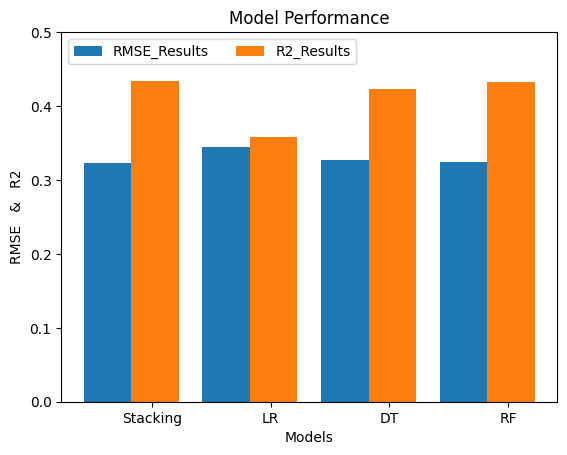

In [ ]:
# comparison

# plt.style.use('bmh')

width = 0.35
multiplier = 0

labels_x = ['Stacking','LR', 'DT', 'RF']
# Y
RMSE_Results = [stack_rmse, lr_rmse, dt_rmse, rf_rmse]
R2_Results = [stack_r2, lr_r2, dt_r2, rf_r2] 
  
X_axis = np.arange(len(labels_x)) 
  
plt.bar(X_axis - 0.2, RMSE_Results, 0.4, label = 'RMSE_Results') 
plt.bar(X_axis + 0.2, R2_Results, 0.4, label = 'R2_Results') 

plt.xticks(X_axis + width/2, labels_x) 

plt.xlabel("Models")
plt.ylabel("RMSE   &   R2")


plt.ylim([0,0.5]) #-- should be from 0 to 1 ,...but i want an enlarged plot
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)


plt.show()


## Compare & Contrast and Analysis
When my initial plan of a Logistic Regression model to start this project failed, I began to clean my data again.  I remove low corrolated data and shrink the dataset, thinking it finally converge enough for the Logistic Regression method.  It didn't work, so I switched to train and test a linear model.  


The linear model was terrible.  I was expecting high linearity because of the high corrolated features in my dataset. Instead, my root means squared error (RMSE) and R-Square (R2) were almost equal and were both around 0.35. By adding in a feature with outliers called 'capital-gain' and testing the size of my training and test data, I saw improvement.  I was able to lower RMSE and raise R2 for my linear model - where RMSE = 0.34 and R2=0.36.  The linear model is still inaccurate, but as best as it can be.  


At this point, I finalized my training and test data sets, and then I trained a Decision Tree (DT) with GridSearch, seeing as there wasn't much linearity in my small dataset.  After experimenting with the two feature dataset, no outlier dataset and the outlier dataset on the DT model, I once again found that the outlier dataset was the best dataset because it so far has yielded the best results for 2 models.  I also found that increasing the number of folds while training and testing with the best dataset gave the best DT results as well.   The DT model had better RMSE and R2 scores than the linear model - 0.33 and 0.42 respectively.  


Then I created an ensemble model with stacking. The first few times, I kept my estimators restricted to a decision tree and a linear model.  With this version of the stack model, I observed the same RMSE and R2 values as I did for the linear model.  I was surprised because I thought I would get better results with the addition of a decision tree since the DT by itself fared better than linear.  The Stacking model performed even worse when trained with fewer features (what I call my linear data).  When trained and tested with the best data (the outlier data), I saw better performance.  Even more improvement came when I added another model to the estimators list - a Random Forest (RF).  When I cut the estimators down to just the DT and RF, I found peak performance with RMSE at 0.32 and R2 scores at 0.43.  Now the Stacking model does marginally better than the DT model.  


Let me explain how I decided to add RF to the ensemble.  I only added RF to the ensemble model after I trained a RF by itself.  The RF was my fourth and last model.  Again, I experimented with different training and test sets, and once again, found that the dataset that brought the peak performance was the dataset with the outlier data.  Once that was established, I played around with the 'max_depth' and 'n_estimators', finding optimial results when 'max_depth'=8 and 'n_estimators'=250.  This created a RF model with RMSE=0.32 and R2=0.43.  These scores are on par with the Stacking model and can be visualized in the bargraph.  


For even better performing models, I think I would have to go back to the original USA Census csv file and find better ways to clean the data.  I think Logistic Regression should have worked for the label of finding if one's income was greater than 50k.  That, or I would need to collect even more data, or my label needs to change.  All in all, more experimentation is needed because these models are not accurate enough! 

In [ ]:
# pickling the 4 models
import pickle


pickle.dump(rf_model, open('rf_model.pkl', 'wb'))
pickle.dump(stacking_model, open('stacking_model.pkl', 'wb'))
pickle.dump(dt_model, open('dt_model.pkl', 'wb'))
pickle.dump(dt_grid, open('dt_grid_model.pkl', 'wb'))
